<a href="https://colab.research.google.com/github/Thilan67/survival_on_the_Titanic/blob/main/HeartDeseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/heart.csv' # Adjust path
heart_df = pd.read_csv(file_path)
heart_df.describe()
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
print(heart_df.isna().sum().sort_values())
heart_df.head()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# Create X and y
X = heart_df .drop("target",axis=1).values
y = heart_df["target"].values

print(X.shape)
print(y.shape)

(1025, 13)
(1025,)


In [ ]:
# Import the module
from sklearn.model_selection import train_test_split

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape)
print(y_test.shape)

(820, 13)
(205,)


In [ ]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression(max_iter=1000)

# Fit the model
logreg.fit(X_train,y_train)

y_pred =logreg.predict(X_test)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

# Print the accuracy
print(logreg.score(X_test, y_test))

0.8146341463414634


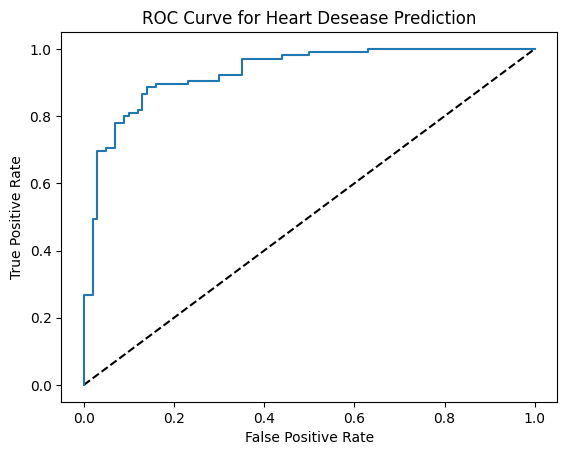

In [ ]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Desease Prediction')
plt.show()


In [ ]:
# Import confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test,y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test,y_pred))

# Calculate the classification report
print(classification_report(y_test,y_pred))



0.9299047619047619
[[70 30]
 [ 8 97]]
              precision    recall  f1-score   support

           0       0.90      0.70      0.79       100
           1       0.76      0.92      0.84       105

    accuracy                           0.81       205
   macro avg       0.83      0.81      0.81       205
weighted avg       0.83      0.81      0.81       205



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the model
log_reg = LogisticRegression(max_iter=1000)

# Define parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],        # regularization strength
    'penalty': ['l1', 'l2'],                     # type of penalty
    'solver': ['liblinear', 'saga']              # solvers that support l1/l2
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,                      # 5-fold cross-validation
    scoring='accuracy',        # or 'f1', 'roc_auc' depending on what matters
    n_jobs=-1,                 # use all CPU cores
    verbose=1
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Accuracy:", test_score)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Score: 0.8463414634146341
Test Accuracy: 0.8390243902439024


In [ ]:
import joblib

joblib.dump(best_model, "heart_model.pkl")



['heart_model.pkl']

In [2]:
# First, install required packages
!pip install flask flask-ngrok pyngrok

from flask import Flask, request, render_template_string, jsonify
from pyngrok import ngrok
import joblib
import numpy as np
import pandas as pd
import os

# Set your ngrok auth token
ngrok.set_auth_token("31VutwJalOKxNC9qUQiRw3mBwJ9_2yKSokf9R3ngy7399vqyR")

# Load the trained model
try:
    model = joblib.load("heart_model.pkl")
    print("Model loaded successfully!")
except FileNotFoundError:
    print("Error: heart_model.pkl not found. Please upload your trained model file.")
    exit()

app = Flask(__name__)

# Enhanced HTML template with better styling and all heart disease features
HTML_TEMPLATE = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Heart Disease Prediction System</title>
    <style>
        * {
            margin: 0;
            padding: 0;
            box-sizing: border-box;
        }

        body {
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            min-height: 100vh;
            padding: 20px;
        }

        .container {
            max-width: 800px;
            margin: 0 auto;
            background: white;
            border-radius: 15px;
            box-shadow: 0 20px 40px rgba(0,0,0,0.1);
            overflow: hidden;
        }

        .header {
            background: linear-gradient(135deg, #ff6b6b, #ee5a24);
            color: white;
            padding: 30px;
            text-align: center;
        }

        .header h1 {
            font-size: 2.5em;
            margin-bottom: 10px;
        }

        .header p {
            font-size: 1.1em;
            opacity: 0.9;
        }

        .form-container {
            padding: 40px;
        }

        .form-grid {
            display: grid;
            grid-template-columns: repeat(auto-fit, minmax(300px, 1fr));
            gap: 20px;
            margin-bottom: 30px;
        }

        .form-group {
            display: flex;
            flex-direction: column;
        }

        .form-group label {
            font-weight: 600;
            margin-bottom: 8px;
            color: #333;
        }

        .form-group input, .form-group select {
            padding: 12px;
            border: 2px solid #e0e0e0;
            border-radius: 8px;
            font-size: 16px;
            transition: border-color 0.3s;
        }

        .form-group input:focus, .form-group select:focus {
            outline: none;
            border-color: #667eea;
        }

        .submit-btn {
            background: linear-gradient(135deg, #667eea, #764ba2);
            color: white;
            padding: 15px 40px;
            border: none;
            border-radius: 8px;
            font-size: 18px;
            font-weight: 600;
            cursor: pointer;
            transition: transform 0.3s;
            width: 100%;
        }

        .submit-btn:hover {
            transform: translateY(-2px);
        }

        .result {
            margin-top: 30px;
            padding: 20px;
            border-radius: 10px;
            text-align: center;
            font-size: 1.2em;
            font-weight: 600;
        }

        .healthy {
            background: #d4edda;
            color: #155724;
            border: 2px solid #c3e6cb;
        }

        .risk {
            background: #f8d7da;
            color: #721c24;
            border: 2px solid #f5c6cb;
        }

        .info-box {
            background: #e7f3ff;
            padding: 20px;
            border-radius: 10px;
            margin-bottom: 30px;
            border-left: 5px solid #667eea;
        }

        .feature-description {
            font-size: 0.9em;
            color: #666;
            margin-top: 4px;
        }
    </style>
</head>
<body>
    <div class="container">
        <div class="header">
            <h1>❤️ Heart Disease Prediction</h1>
            <p>AI-powered cardiovascular risk assessment</p>
        </div>

        <div class="form-container">
            <div class="info-box">
                <strong>📋 Instructions:</strong> Please fill in all the required medical parameters below.
                Our machine learning model will analyze the data to assess cardiovascular risk.
            </div>

            <form action="/predict" method="post">
                <div class="form-grid">
                    <div class="form-group">
                        <label for="age">Age (years)</label>
                        <input type="number" name="age" id="age" min="1" max="120" required>
                        <div class="feature-description">Patient's age in years</div>
                    </div>

                    <div class="form-group">
                        <label for="sex">Sex</label>
                        <select name="sex" id="sex" required>
                            <option value="">Select...</option>
                            <option value="1">Male</option>
                            <option value="0">Female</option>
                        </select>
                        <div class="feature-description">Biological sex</div>
                    </div>

                    <div class="form-group">
                        <label for="cp">Chest Pain Type</label>
                        <select name="cp" id="cp" required>
                            <option value="">Select...</option>
                            <option value="0">Typical Angina</option>
                            <option value="1">Atypical Angina</option>
                            <option value="2">Non-Anginal Pain</option>
                            <option value="3">Asymptomatic</option>
                        </select>
                        <div class="feature-description">Type of chest pain experienced</div>
                    </div>

                    <div class="form-group">
                        <label for="trestbps">Resting Blood Pressure (mmHg)</label>
                        <input type="number" name="trestbps" id="trestbps" min="80" max="250" required>
                        <div class="feature-description">Blood pressure when at rest</div>
                    </div>

                    <div class="form-group">
                        <label for="chol">Cholesterol (mg/dl)</label>
                        <input type="number" name="chol" id="chol" min="100" max="600" required>
                        <div class="feature-description">Serum cholesterol level</div>
                    </div>

                    <div class="form-group">
                        <label for="fbs">Fasting Blood Sugar > 120 mg/dl</label>
                        <select name="fbs" id="fbs" required>
                            <option value="">Select...</option>
                            <option value="1">Yes</option>
                            <option value="0">No</option>
                        </select>
                        <div class="feature-description">Is fasting blood sugar > 120 mg/dl?</div>
                    </div>

                    <div class="form-group">
                        <label for="restecg">Resting ECG Results</label>
                        <select name="restecg" id="restecg" required>
                            <option value="">Select...</option>
                            <option value="0">Normal</option>
                            <option value="1">ST-T Wave Abnormality</option>
                            <option value="2">Left Ventricular Hypertrophy</option>
                        </select>
                        <div class="feature-description">Resting electrocardiographic results</div>
                    </div>

                    <div class="form-group">
                        <label for="thalach">Maximum Heart Rate Achieved</label>
                        <input type="number" name="thalach" id="thalach" min="60" max="220" required>
                        <div class="feature-description">Maximum heart rate during exercise</div>
                    </div>

                    <div class="form-group">
                        <label for="exang">Exercise Induced Angina</label>
                        <select name="exang" id="exang" required>
                            <option value="">Select...</option>
                            <option value="1">Yes</option>
                            <option value="0">No</option>
                        </select>
                        <div class="feature-description">Chest pain during exercise?</div>
                    </div>

                    <div class="form-group">
                        <label for="oldpeak">ST Depression</label>
                        <input type="number" name="oldpeak" id="oldpeak" step="0.1" min="0" max="10" required>
                        <div class="feature-description">ST depression induced by exercise</div>
                    </div>

                    <div class="form-group">
                        <label for="slope">Slope of Peak Exercise ST Segment</label>
                        <select name="slope" id="slope" required>
                            <option value="">Select...</option>
                            <option value="0">Upsloping</option>
                            <option value="1">Flat</option>
                            <option value="2">Downsloping</option>
                        </select>
                        <div class="feature-description">Slope of ST segment during peak exercise</div>
                    </div>

                    <div class="form-group">
                        <label for="ca">Number of Major Vessels</label>
                        <select name="ca" id="ca" required>
                            <option value="">Select...</option>
                            <option value="0">0</option>
                            <option value="1">1</option>
                            <option value="2">2</option>
                            <option value="3">3</option>
                        </select>
                        <div class="feature-description">Major vessels colored by fluoroscopy</div>
                    </div>

                    <div class="form-group">
                        <label for="thal">Thalassemia</label>
                        <select name="thal" id="thal" required>
                            <option value="">Select...</option>
                            <option value="1">Normal</option>
                            <option value="2">Fixed Defect</option>
                            <option value="3">Reversible Defect</option>
                        </select>
                        <div class="feature-description">Blood disorder status</div>
                    </div>
                </div>

                <button type="submit" class="submit-btn">🔍 Predict Heart Disease Risk</button>
            </form>

            {% if prediction %}
                <div class="result {{ 'risk' if prediction_class == 1 else 'healthy' }}">
                    <h3>📊 Prediction Result</h3>
                    <p><strong>{{ prediction }}</strong></p>
                    {% if confidence %}
                        <p>Confidence: {{ confidence }}%</p>
                    {% endif %}
                    {% if recommendation %}
                        <p style="margin-top: 15px; font-size: 1em;">
                            <strong>Recommendation:</strong> {{ recommendation }}
                        </p>
                    {% endif %}
                </div>
            {% endif %}
        </div>
    </div>
</body>
</html>
"""

@app.route("/")
def home():
    return render_template_string(HTML_TEMPLATE)

@app.route("/predict", methods=["POST"])
def predict():
    try:
        # Extract features from form
        features = []
        feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
                        'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

        for feature in feature_names:
            value = request.form.get(feature)
            if value is None or value == '':
                return render_template_string(HTML_TEMPLATE,
                    prediction="Error: Please fill in all fields",
                    prediction_class=0)
            features.append(float(value))

        # Prepare features for prediction
        features_array = np.array(features).reshape(1, -1)

        # Make prediction
        prediction = model.predict(features_array)[0]

        # Get prediction probability if available
        confidence = None
        if hasattr(model, 'predict_proba'):
            prob = model.predict_proba(features_array)[0]
            confidence = round(max(prob) * 100, 1)

        # Generate result and recommendation
        if prediction == 1:
            result = "⚠️ HIGH RISK - Heart Disease Detected"
            recommendation = "Please consult a cardiologist immediately for further evaluation and treatment."
        else:
            result = "✅ LOW RISK - No Heart Disease Detected"
            recommendation = "Maintain a healthy lifestyle with regular exercise and balanced diet."

        return render_template_string(HTML_TEMPLATE,
                                    prediction=result,
                                    prediction_class=prediction,
                                    confidence=confidence,
                                    recommendation=recommendation)

    except Exception as e:
        return render_template_string(HTML_TEMPLATE,
                                    prediction=f"Error: {str(e)}",
                                    prediction_class=0)

@app.route("/api/predict", methods=["POST"])
def api_predict():
    """API endpoint for programmatic access"""
    try:
        data = request.json
        features = [data['age'], data['sex'], data['cp'], data['trestbps'],
                   data['chol'], data['fbs'], data['restecg'], data['thalach'],
                   data['exang'], data['oldpeak'], data['slope'], data['ca'], data['thal']]

        features_array = np.array(features).reshape(1, -1)
        prediction = model.predict(features_array)[0]

        confidence = None
        if hasattr(model, 'predict_proba'):
            prob = model.predict_proba(features_array)[0]
            confidence = round(max(prob) * 100, 1)

        return jsonify({
            'prediction': int(prediction),
            'risk_level': 'High Risk' if prediction == 1 else 'Low Risk',
            'confidence': confidence
        })

    except Exception as e:
        return jsonify({'error': str(e)}), 400

# Function to start the app with ngrok
def run_app():
    # Kill any existing ngrok tunnels
    ngrok.kill()

    # Start ngrok tunnel
    public_url = ngrok.connect(5000)
    print(f"\n🌐 Your app is running at: {public_url}")
    print("📱 You can access this URL from any device!")
    print("⚠️  Note: This URL will be available as long as this Colab session is running")

    # Run the Flask app
    app.run(host='0.0.0.0', port=5000, debug=True, use_reloader=False)



Model loaded successfully!


In [4]:
run_app()


🌐 Your app is running at: NgrokTunnel: "https://5cd852c887b3.ngrok-free.app" -> "http://localhost:5000"
📱 You can access this URL from any device!
⚠️  Note: This URL will be available as long as this Colab session is running
 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [20/Aug/2025 11:44:05] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Aug/2025 11:44:06] "GET /favicon.ico HTTP/1.1" 404 -
